# Lab: 3: Basic Image Processing 2

Group Members:
        1. Muahammad Rizwan Khalid (180459)
        2. Muhammad Roshan Mughees (193590)

Class:  __BSCS-6A__ 

In [1]:
from PIL import Image

#### We are opening each image as a grayscale image

In [2]:
image_file = Image.open("B3.jpg")
image_file= image_file.convert('L')# convert image to black and white
image_file.show()

#### The Following Algorithm Basically sets the pixel values based on specific threshold. We find threshold values by hit and trial for the three images.

In [3]:
import itertools
img = Image.new( image_file.mode, image_file.size)
pixelsNew = img.load()
for x,y in itertools.product(range(0,image_file.size[0]),range(0,image_file.size[1])):
    color = image_file.getpixel((x,y))
    if color>=190:
        pixelsNew[(x, y)]= 255
    else: 
        pixelsNew[(x, y)] = 0
img.show()

# Task:01:
Every image has different intensity for gray levels for each pixel. In short, we cannot have one and only threshold for every image. Below is the results along with threshold values:
#### 1. Threshold for first image is 150 <img src="result-b1.png">
#### 2. Threshold for first image is 128 <img src="result-b2.png">
#### 3. Threshold for first image is 190 <img src="result-b3.png">

#### The following code basically draws the histogram for image. On x-axis there are gray-levels from 0-255 while on y-axis there is the frequency of each gray level in the image.

In [4]:
dic = dict()
for x,y in itertools.product(range(0,image_file.size[0]),range(0,image_file.size[1])):
    color = image_file.getpixel((x,y))
    if int(color) not in dic:
        dic[int(color)] = 1
    else:
        dic[int(color)] = dic[int(color)] + 1

#### Displaying in line histogram

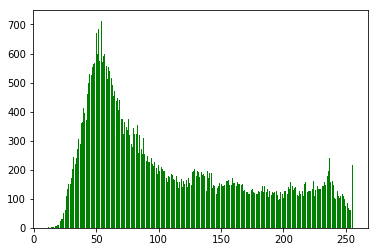

In [11]:
import matplotlib.pyplot as plt
plt.bar(dic.keys(), dic.values(), color='g')
plt.show()

In [6]:
image_file = Image.open("XY-cutss.png")
image_file= image_file.convert('1')

In [7]:
image_file.show()

#### The following code basically calculates the number of black pixels on each row

In [8]:
foo= dict()
for x in range(0,image_file.size[1]):
    count =0
    for y in range(0,image_file.size[0]):
        color = image_file.getpixel((y,x))
        if color is 0:
            count+=1
    foo[x]=count

#### Displaying the histogram. X-axis represents the row and Y-axis represents the number of black pixels

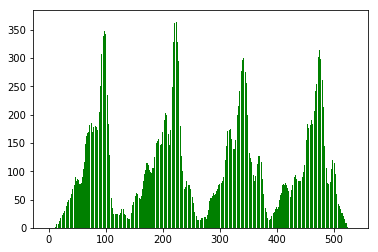

In [9]:
plt.bar(foo.keys(),foo.values(), color='g')
plt.show()

In [10]:
img = Image.new( image_file.mode, image_file.size)
pixelsNew = img.load()
pixelOld= image_file.load()
for x,y in itertools.product(range(0,image_file.size[0]),range(0,image_file.size[1])):
    color = image_file.getpixel((x,y))
    if foo[y]<=40:
        pixelsNew[(x, y)]= 0
    else:
        pixelsNew[(x, y)] =pixelOld[(x,y)] 
img.show()

#### The above code snipet basically checks if the no. of black pixels on any row is less than 40 it simply puts the black line there
#### So, it separates out the textual region. We can also say that it separtes foreground from the background. The resultant image of above is shown below: <img src="result-b4.png">

# END